In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
max_precipitacion_anual = pd.read_excel(io ='Estaciones.xlsx', sheet_name="Maximos",usecols=['Unnamed: 0','Unnamed: 13'])
max_precipitacion_anual.head()

,Unnamed: 0,Unnamed: 13
0,Año hid,San Luis Tucuman
1,1946,NaN
2,1947,NaN
3,1948,NaN
4,1949,NaN


In [3]:
tot_precipitacion_anual = pd.read_excel(io ='Estaciones.xlsx', sheet_name="Anuales",usecols=['Unnamed: 0','Unnamed: 13'])
tot_precipitacion_anual.head()

,Unnamed: 0,Unnamed: 13
0,Año hid,San Luis Tucuman
1,1946,NaN
2,1947,NaN
3,1948,NaN
4,1949,NaN


In [4]:
max_precipitacion_anual.rename(columns={'Unnamed: 0':'año', 'Unnamed: 13':'San Luis'},inplace=True)
max_precipitacion_anual.dropna(inplace=True)

In [5]:
max_precipitacion_anual

,año,San Luis
0,Año hid,San Luis Tucuman
28,1973,300
29,1974,160
30,1975,110
31,1976,145
32,1977,96
33,1978,81
34,1979,76
35,1980,76
36,1981,107


In [6]:
tot_precipitacion_anual.rename(columns={'Unnamed: 0':'año', 'Unnamed: 13':'San Luis'},inplace=True)

In [7]:
tot_precipitacion_anual.drop([0],axis=0,inplace=True)

In [8]:
tot_precipitacion_anual.dropna(inplace=True)

In [9]:
tot_precipitacion_anual

,año,San Luis
28,1973,1287
29,1974,1376
30,1975,852.5
31,1976,1140
32,1977,1034
33,1978,917
34,1979,1260
35,1980,1206
36,1981,1182
37,1982,932


In [10]:
max_precipitacion_anual.rename(columns={ 'San Luis':'max_precipitacion_anual'},inplace=True)
tot_precipitacion_anual.rename(columns={'San Luis':'tot_precipitacion_anual'},inplace=True)

In [11]:
precipitacion_anual_sanluis= tot_precipitacion_anual.merge(max_precipitacion_anual,on='año')
precipitacion_anual_sanluis

,año,tot_precipitacion_anual,max_precipitacion_anual
0,1973,1287,300
1,1974,1376,160
2,1975,852.5,110
3,1976,1140,145
4,1977,1034,96
5,1978,917,81
6,1979,1260,76
7,1980,1206,76
8,1981,1182,107
9,1982,932,62


In [12]:
variables_e_indices_NDEFM = pd.read_excel("variables e indices NDEFM.xlsx")
variables_e_indices_NDEFM.head()

,año,humedad esp (g/kg),omega (Pa/s),SLP PACIFICO,P ATL,indice SOI,indice SAM,
0,1949,8.7958,0.002598,1018.8150,1017.2874,NaN,NaN,NaN
1,1950,10.6268,-0.022770,1019.0520,1015.9596,NaN,NaN,NaN
2,1951,10.2252,-0.020314,1018.1772,1016.6636,NaN,NaN,NaN
3,1952,11.3264,-0.026402,1019.0196,1016.5650,-0.50,NaN,NaN
4,1953,11.2208,-0.024602,1020.5140,1016.7198,-0.32,NaN,NaN


In [13]:
año_soi = variables_e_indices_NDEFM[['año','indice SOI']]
año_soi

,año,indice SOI
0,1949,NaN
1,1950,NaN
2,1951,NaN
3,1952,-0.50
4,1953,-0.32
...,...,...
56,2005,-0.80
57,2006,0.68
58,2007,-0.18
59,2008,1.68


In [14]:
san_luis_soi = precipitacion_anual_sanluis.merge(año_soi)
san_luis_soi

,año,tot_precipitacion_anual,max_precipitacion_anual,indice SOI
0,1973,1287,300,-0.52
1,1974,1376,160,2.26
2,1975,852.5,110,0.40
3,1976,1140,145,1.62
4,1977,1034,96,0.14
5,1978,917,81,-1.12
6,1979,1260,76,0.12
7,1980,1206,76,-0.16
8,1981,1182,107,-0.30
9,1982,932,62,0.56


In [27]:
san_luis_soi['ultimos_10'] = san_luis_soi['año'].between(1990, 2000)

In [28]:
san_luis_soi['max_precipitacion_anual'] = san_luis_soi['max_precipitacion_anual'].astype(int)
san_luis_soi

,año,tot_precipitacion_anual,max_precipitacion_anual,indice SOI,ultimos_20,ultimos_10
0,1973,1287,300,-0.52,False,False
1,1974,1376,160,2.26,False,False
2,1975,852.5,110,0.40,False,False
3,1976,1140,145,1.62,False,False
4,1977,1034,96,0.14,False,False
5,1978,917,81,-1.12,False,False
6,1979,1260,76,0.12,False,False
7,1980,1206,76,-0.16,True,False
8,1981,1182,107,-0.30,True,False
9,1982,932,62,0.56,True,False


Text(0.5, 0, 'Maxima precipitación en mm')

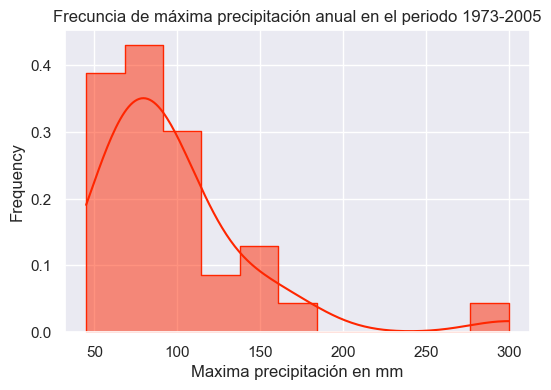

In [56]:
sns.set(rc={"figure.dpi":100})
norm = plt.Normalize()

ax = sns.histplot(data=san_luis_soi,x='max_precipitacion_anual',kde=True,element="step",stat='frequency',color=norm((235,133,115)))
ax.set_title("Frecuncia de máxima precipitación anual en el periodo 1973-2005")
ax.set_xlabel("Maxima precipitación en mm")

In [29]:
ultimos_diez = san_luis_soi.groupby(['ultimos_10']).get_group(True)
ultimos_diez

,año,tot_precipitacion_anual,max_precipitacion_anual,indice SOI,ultimos_20,ultimos_10
17,1990,683,45,-0.60,True,True
18,1991,1085,67,-0.10,True,True
19,1992,860,67,-1.66,True,True
20,1993,1027,88,-0.68,True,True
21,1994,823,71,-0.08,True,True
22,1995,624,63,-0.30,True,True
23,1996,830,122,0.38,True,True
24,1997,1041,67,0.52,True,True
25,1998,979,65,-1.86,True,True
26,1999,1058,73,1.30,True,True


Text(0, 0.5, 'SOI')

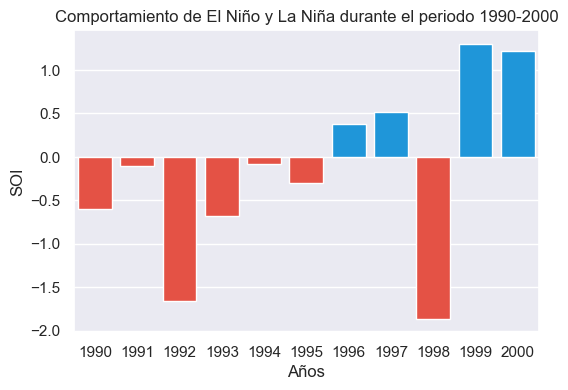

In [47]:
clrs = [(58,180,250) if (y > 0) else (255,104,91) for y in ultimos_diez['indice SOI'] ]
norm = plt.Normalize()

sns.set(rc={"figure.dpi":100})
ax = sns.barplot(data=ultimos_diez,x='año',y='indice SOI',palette=norm(clrs))
ax.set_title("Comportamiento de El Niño y La Niña durante el periodo 1990-2000")
ax.set_xlabel("Años")
ax.set_ylabel("SOI")
#ax.bar([ ],[ ] ,color=norm([(58,180,250)]), legend="El niño")
#ax.bar([ ],[ ] ,color=norm([(255,104,91)]), legend="La niña")
#ax.legend()